/tmp/ipykernel_463879/1997174787.py:77: UserWarning:

You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.



TypeError: distplot() got an unexpected keyword argument 'kind'

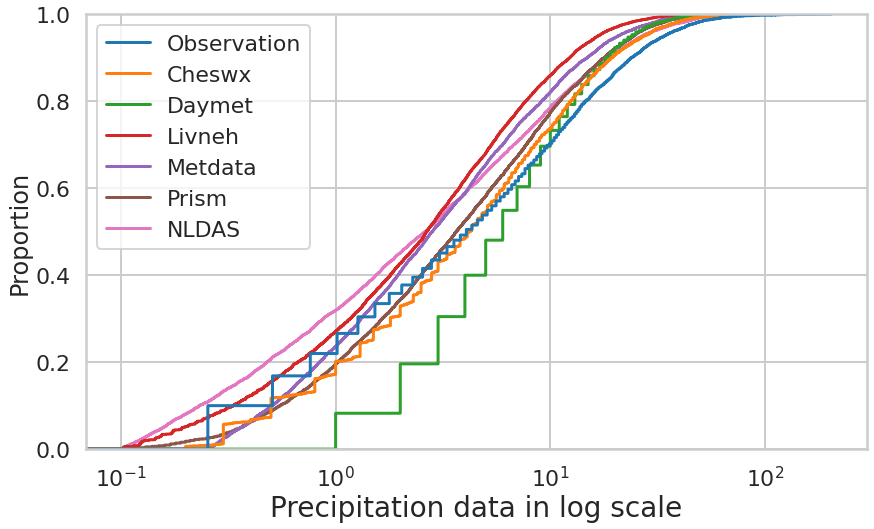

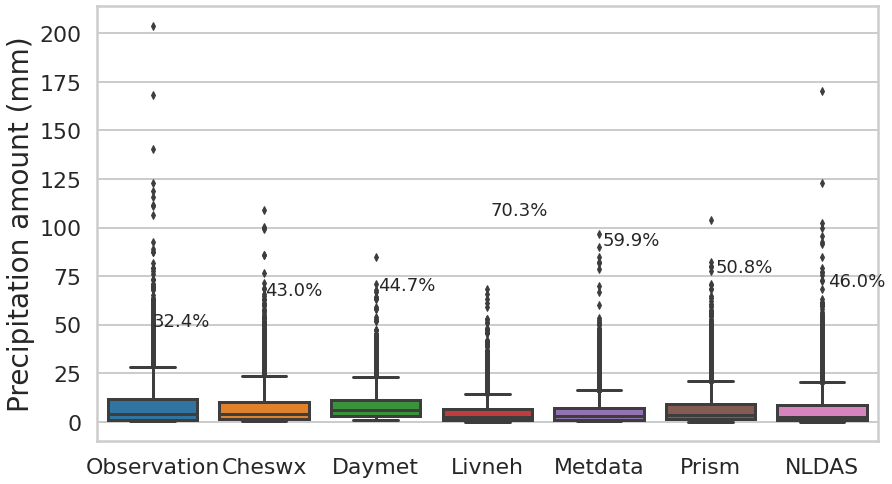

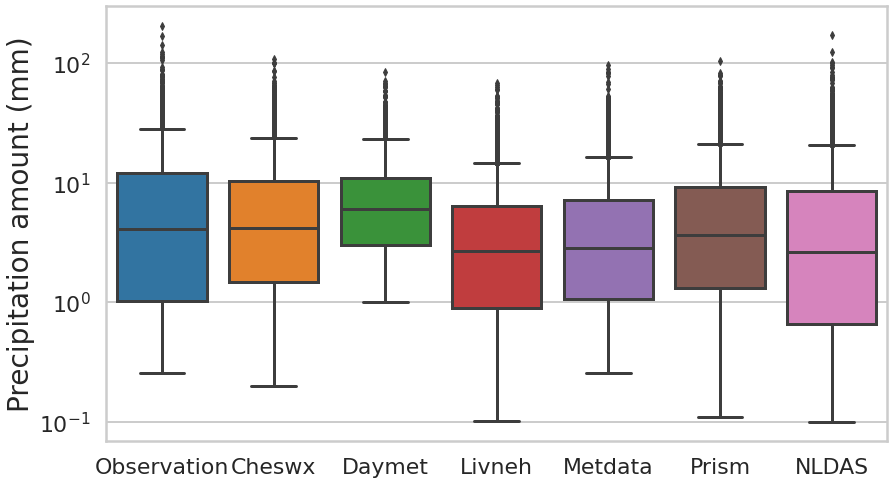

<Figure size 1008x576 with 0 Axes>

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


df = pd.read_excel("/home/suhail/Downloads/cheswx/nldas2/weather_prodcut.xls")


df.dtypes
cols=df.columns
df[cols] = df[cols].replace({"NaN":np.nan})
df.apply(pd.to_numeric, errors = 'coerce')


# DATASET FOR HIGHER THAN 1 MM


df_1mm = (df.where(df>1.0))

numeric_df_1mm = df_1mm.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

df_nn = (df_1mm.notnull().sum())/len(df)*100

df_1mm.to_csv('out.csv', index=False )

# DATASET FOR HIGHER THAN 0.1 MM

df_1by10mm = (df.where(df>0.1))

numeric_df_1by10mm = df_1by10mm.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

df_nn_1by10mm = (df_1by10mm.notnull().sum())/len(df)*100


# DATASET FOR HIGHER THAN 0.01 MM

df_1by100mm = (df.where(df>0.01))

numeric_df_1by100mm = df_1by100mm.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

df_nn_1by100mm = (df_1by100mm.notnull().sum())/len(df)*100


# DATASET FOR HIGHER THAN 0 MM

df_0mm = (df.where(df>0))

numeric_df_0mm = df_0mm.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

df_nn_0mm = (df_0mm.notnull().sum())/len(df)*100



#Visualization

df_plot = df_1by10mm
df_num_plot = numeric_df_1by10mm
perc_plot = df_nn_1by10mm

# sns.set_context("poster")

#px.line(df_1mm,x =df_1mm['Observation'])

plt.figure(figsize=(14,8))
q = sns.ecdfplot(data=df_1by10mm)
q.set_xscale('log')
#q.set_xlim(df_1by10mm.min().min(),df_1mm.max().max())
plt.xlabel("Precipitation data in log scale", fontsize=28)


plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
p=sns.boxplot(data=df_plot)
for i in range(len(perc_plot)):
    p.annotate(str("{:.1f}%".format(perc_plot[i])),xy = (i,perc_plot[i]),textcoords='offset points',fontsize=18)
p.set_ylabel("Precipitation amount (mm)", fontsize = 28)

plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
p=sns.boxplot(data=df_1by10mm)
p.set_yscale('log')
p.set_ylabel("Precipitation amount (mm)", fontsize = 28)


plt.figure(figsize=(14,8))
sns.distplot(df_plot,kind='kde')


In [168]:
df_1mm.min().min()

1.0001